Understanding the dataset distribution

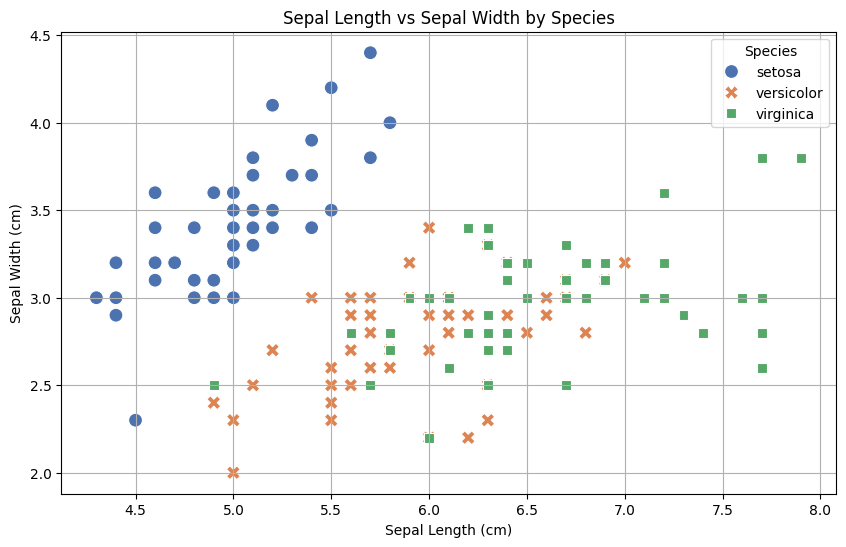

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Convert to a Pandas DataFrame for easier handling
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target
data['species'] = data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Scatter plot to show the relationships between features
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue='species',
    style='species',
    palette='deep',
    s=100
)
plt.title('Sepal Length vs Sepal Width by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.grid(True)
plt.show()

Looking at the total number of values present for each species

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the IRIS dataset
iris = load_iris()

# Create a DataFrame for better visualization
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target  # Add the target (species) column
iris_df['species_name'] = iris_df['species'].apply(lambda x: iris.target_names[x])  # Map target to species names

# Count of each species
species_count = iris_df['species_name'].value_counts()
print("\nCount of each species:")
print(species_count)


Count of each species:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


Tp check if the dataset has null values

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the IRIS dataset
iris = load_iris()

# Create a DataFrame for better visualization
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

null_values = iris_df.isnull().sum()

# Display the results
print("Null values in each column:")
print(null_values)

# Check if there are any null values in the entire dataset
if null_values.sum() > 0:
    print("\nThe dataset contains null values.")
else:
    print("\nThe dataset does not contain any null values.")

Null values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

The dataset does not contain any null values.


 split dataset 80%- Train , 20% testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd

# Load the IRIS dataset
iris = load_iris()

# Create a DataFrame for better visualization
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target  # Add the target (species) column
iris_df['species_name'] = iris_df['species'].apply(lambda x: iris.target_names[x])  # Map target to species names

# Features (X) and labels (y)
X = iris_df.drop(columns=['species'])  # All features
y = iris_df['species']  # Labels (target variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Display the sizes of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 120 samples
Testing set size: 30 samples


test and train the dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the IRIS dataset
iris = load_iris()

# Create a DataFrame for better visualization
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target  # Add the target (species) column
iris_df['species_name'] = iris_df['species'].apply(lambda x: iris.target_names[x])  # Map target to species names

# Features (X) and labels (y)
X = iris_df.drop(columns=['species', 'species_name'])  # Drop non-numeric columns
y = iris_df['species']  # Labels (target variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



 changing the same code to have 70% training dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the IRIS dataset
iris = load_iris()

# Create a DataFrame for better visualization
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target  # Add the target (species) column
iris_df['species_name'] = iris_df['species'].apply(lambda x: iris.target_names[x])  # Map target to species names

# Features (X) and labels (y)
X = iris_df.drop(columns=['species', 'species_name'])  # Drop non-numeric columns
y = iris_df['species']  # Labels (target variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 decision trees

# Train the model on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



*******************connect with Git***********************************

In [2]:
! ssh-keygen -t rsa -b 4096

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): SSHKeyPair
Enter passphrase (empty for no passphrase): key
Enter same passphrase again: key
Your identification has been saved in SSHKeyPair
Your public key has been saved in SSHKeyPair.pub
The key fingerprint is:
SHA256:14AdulM2iPK1PifiYqN+hZ2ebbOr6BcXXE16jPRd/vA root@a15ebfdd6903
The key's randomart image is:
+---[RSA 4096]----+
|          oo.   .|
|       . *.*.. o |
|    . ..=.O + o .|
|     o .o= =   o.|
|     o..S.. .   E|
|    . =..o       |
|     o.=+ .      |
|    =o+.++       |
| .o=o+ooo+       |
+----[SHA256]-----+
